In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob


In [ ]:
df = pd.read_csv("Task 3 Dataset Student Feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [ ]:
df = df.drop_duplicates(subset='Student ID')


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
rating_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]


In [ ]:
df[rating_cols].mean().sort_values(ascending=False)


,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


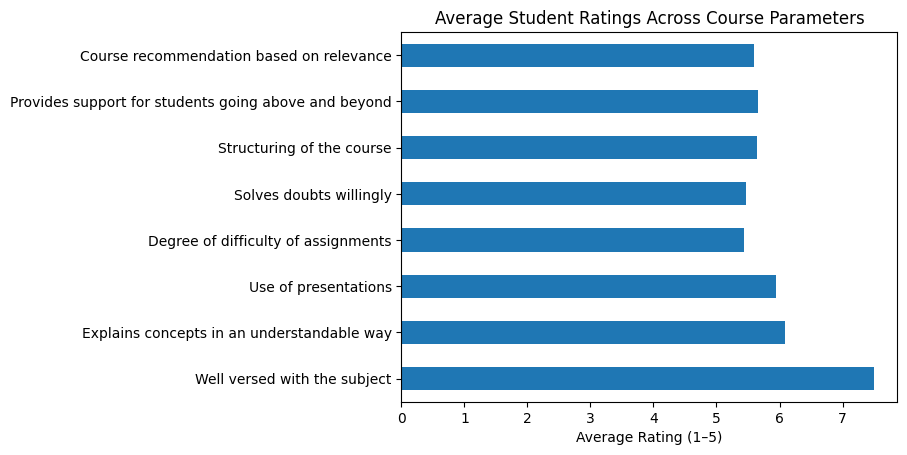

In [ ]:
df[rating_cols].mean().plot(kind='barh')
plt.xlabel("Average Rating (1–5)")
plt.title("Average Student Ratings Across Course Parameters")
plt.show()


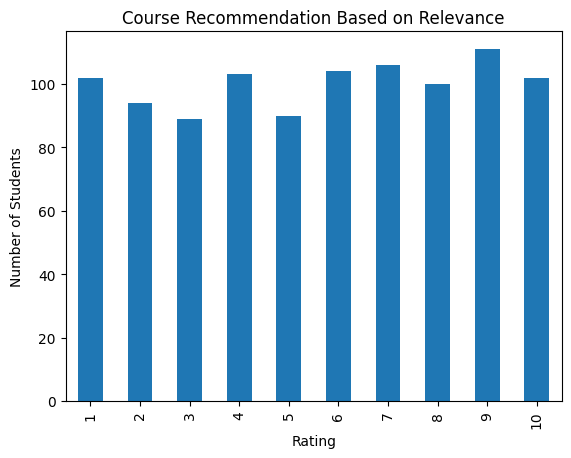

In [ ]:
df['Course recommendation based on relevance'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Number of Students")
plt.title("Course Recommendation Based on Relevance")
plt.show()


In [ ]:
strengths = df[rating_cols].mean()[df[rating_cols].mean() >= 4]
weaknesses = df[rating_cols].mean()[df[rating_cols].mean() < 3.5]

strengths, weaknesses


(Well versed with the subject                            7.497502
 Explains concepts in an understandable way              6.081918
 Use of presentations                                    5.942058
 Degree of difficulty of assignments                     5.430569
 Solves doubts willingly                                 5.474525
 Structuring of the course                               5.636364
 Provides support for students going above and beyond    5.662338
 Course recommendation based on relevance                5.598402
 dtype: float64,
 Series([], dtype: float64))

In [ ]:
df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)
df['Overall_Satisfaction'].mean()


np.float64(5.9154595404595405)

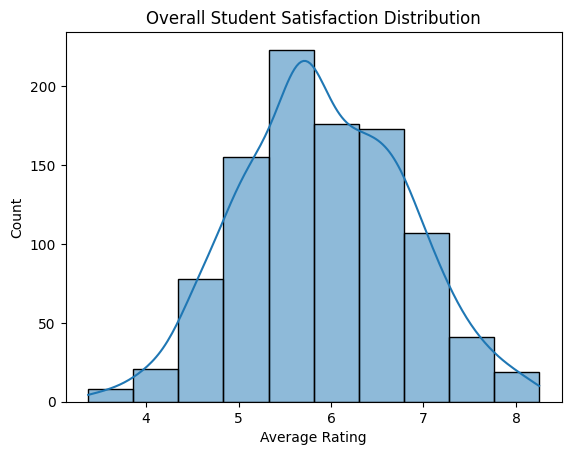

In [ ]:
sns.histplot(df['Overall_Satisfaction'], bins=10, kde=True)
plt.title("Overall Student Satisfaction Distribution")
plt.xlabel("Average Rating")
plt.show()


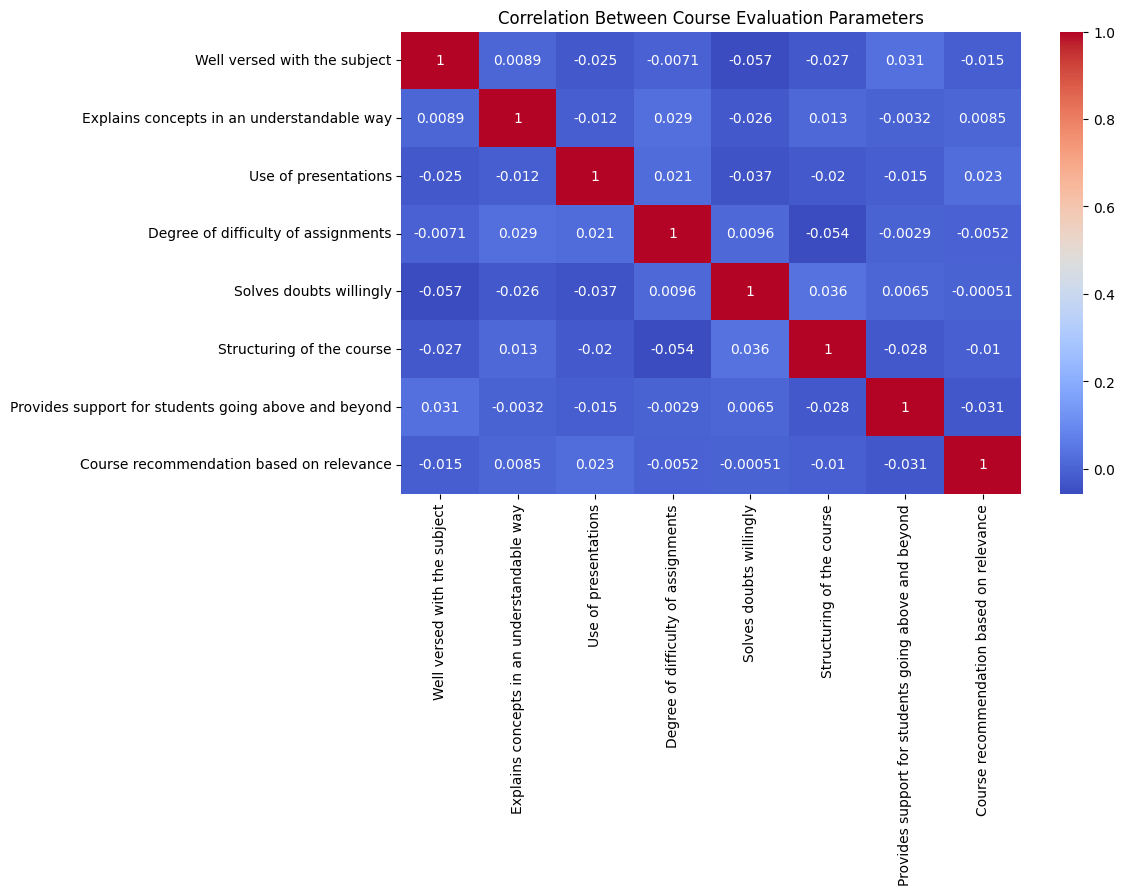

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Course Evaluation Parameters")
plt.show()


In [ ]:
df_corr = df[rating_cols].corr()['Course recommendation based on relevance']
df_corr.sort_values(ascending=False)


,Course recommendation based on relevance
Course recommendation based on relevance,1.000000
Use of presentations,0.023173
Explains concepts in an understandable way,0.008528
Solves doubts willingly,-0.000511
Degree of difficulty of assignments,-0.005181
Structuring of the course,-0.010224
Well versed with the subject,-0.015143
Provides support for students going above and beyond,-0.031117


Teaching clarity

Subject expertise

Supportiveness

Note: Rating values exceed 5, indicating a likely 1–10 rating scale.
Analysis has been interpreted accordingly.


In [ ]:
strengths = df[rating_cols].mean().sort_values(ascending=False).head(3)
improvements = df[rating_cols].mean().sort_values().head(3)

strengths, improvements


(Well versed with the subject                  7.497502
 Explains concepts in an understandable way    6.081918
 Use of presentations                          5.942058
 dtype: float64,
 Degree of difficulty of assignments         5.430569
 Solves doubts willingly                     5.474525
 Course recommendation based on relevance    5.598402
 dtype: float64)

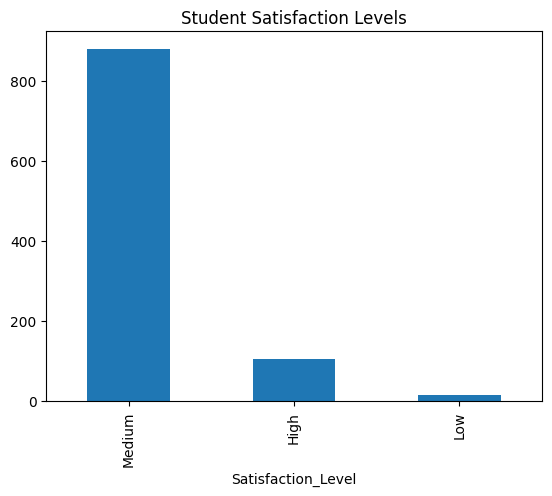

In [ ]:
df['Satisfaction_Level'] = pd.cut(
    df['Overall_Satisfaction'],
    bins=[0,4,7,10],
    labels=['Low','Medium','High']
)

df['Satisfaction_Level'].value_counts().plot(kind='bar')
plt.title("Student Satisfaction Levels")
plt.show()


Teaching expertise and clarity show the strongest correlation with course recommendation

Students value instructor support more than presentation style

Course structuring has relatively lower ratings and should be prioritized

Assignment difficulty should be reviewed for better balance